# Learning Linear Regression

I recently decided to learn about the main aspects of some mathematical/statistical models, which are today highly associated with machine learning models. This knowledge will certainly help me to choose the ones who fits best to the problem I'm solving. Also, understanding the basic ones will make the hardest ones easier, given that all models do almost the same thing in essence. the first model I wanna understand better is **Linear Regression**, which is simpler compared to other models.

## What is Linear Regression?

Linear regression is a statistical method used to model the relationship between a dependent variable (our target) and one or many independent variables by fitting a linear equation to the observed data. Mathematically, its a weighted sum of input values plus a bias value, which maps to a prediction.

`predicton =  X(1) * W(1) + Bias`

The simplicity of Linear Regression what makes it be largely used in business, as its a cheaper and faster to implement tool for specially for trend understanding, for understanding correlations and the impact of variables on  a independent variable, as the association between variables. With good data, it can be all you need to solve some business problems.

## Limitations of Linear Regression

* Can't deal with non linear relationships.

* It is sensible to outliers.

### Obtaining data

For data, I wasn't able to choose any database, so I decided to just generate some **synthetic data**, as this is just a learning purpose experiment. Also *Synthetic Data Generation* is a area that has catch my attention recently, so I'll probably write more about any soon.

The cells bellow are responsible for generating a dataset which can be modeled by a linear regressor. We have a class with some useful parameters like how many columns we want in the dataset, in case you want to generate a dataset for **multiple linear regression**.

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    os.makedirs("datasets")
except FileExistsError:
    pass


C:\Users\natan\AppData\Local\Temp\ipykernel_18408\2829726482.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from sklearn.datasets import make_regression

class SyntheticDataGenerator:
    def __init__(self, n_samples=100, n_features=1, noise=0.0, random_state=None):
        self.n_samples = n_samples
        self.n_features = n_features
        self.noise = noise
        self.random_state = random_state
        self.X = None
        self.y = None

    def generate_data(self):
        self.X, self.y = make_regression(
            n_samples=self.n_samples,
            n_features=self.n_features,
            noise=self.noise,
            random_state=self.random_state
        )

    def save_data_to_file(self, file_path, append=False):
        data = pd.DataFrame(
            np.hstack((self.X, self.y.reshape(-1, 1))), 
            columns=[f"X{i}" for i in range(self.n_features)] + ['y']
        )
        mode = 'a' if append else 'w'
        header = append is False
        data.to_csv(file_path, mode=mode, header=header, index=False)


I organized the generation parameters so We can easily modify if needed.

In [3]:
dataset1_parameters = {
    'n_samples': 10000,
    'n_features': 1,
    'noise': 8,
    'file_path': 'datasets/synthetic_data_1.csv',
    'color': ['orange']
}

In [4]:
data_generator = SyntheticDataGenerator(
    n_samples=dataset1_parameters['n_samples'], 
    n_features=dataset1_parameters['n_features'],
    noise=dataset1_parameters['noise'])

data_generator.generate_data()

## This line writes the data to a file.
## Leave it commented so you don't overwrite your data accidentally
## by running "run all cells"

# data_generator.save_data_to_file(dataset1_parameters['file_path'])

Congratulations, you just created your own synthetic dataset.

## Visualizing the data

Now we can view some random samples from this synthetic dataset and some characteristics of this data as well:

In [5]:
df = pd.read_csv(dataset1_parameters['file_path'])

df.sample(5)

,X0,y
9321,-1.006233,-68.440471
8254,-0.678059,-58.090667
5340,-0.456241,-43.400430
1459,-0.214949,-15.426940
5594,1.878559,142.694605


In [6]:
df.describe()

,X0,y
count,10000.000000,10000.000000
mean,0.002072,0.207728
std,0.998829,72.740408
min,-3.394498,-247.122195
25%,-0.659051,-48.144445
50%,-0.005143,-0.335417
75%,0.674900,48.654308
max,3.944751,288.983263


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      10000 non-null  float64
 1   y       10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


we can also plot this data to see how it behaves

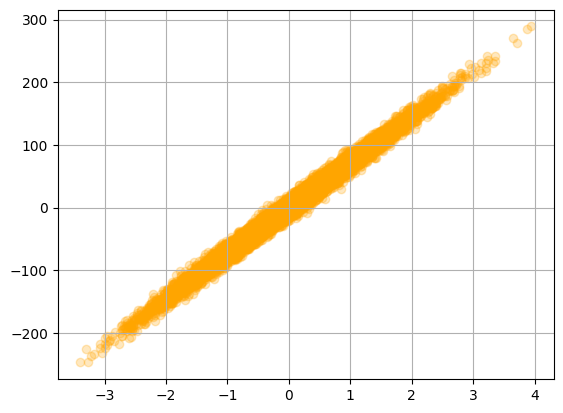

In [8]:
plt.scatter(x=df['X0'], y=df['y'], color=dataset1_parameters['color'], alpha=0.25)
plt.grid()
plt.show()

Linear data tends to be simple for humans to understand. We're able to notice
the "linear behavior".

In this case we have a positive correlation between `X0` and `y`.

## Training your first linear regressor

### Train and test data

In [9]:
from sklearn.model_selection import train_test_split

X = df['X0']
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

X_train = np.array(X_train).reshape((-1, 1))
X_test = np.array(X_test).reshape((-1, 1))
y_train = np.array(y_train).reshape((-1, 1))
y_test = np.array(y_test).reshape((-1, 1))

### Baseline

Its always good to have a point of caparison before starting doing a machine learning model. This is because we need a reference point to evaluate our model performance. The baseline is the minimum performance our model has to overcome to actually be considered a good model.

In [10]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

baseline_regressor = DummyRegressor(strategy='constant', constant=1)

baseline_regressor.fit(X_train, y_train)

baseline_predictions = baseline_regressor.predict(X_train)

mse = mean_squared_error(y_train, baseline_predictions)
r2 = r2_score(y_train, baseline_predictions)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 5292.822019547855
R² Score: -0.00031206144983575435


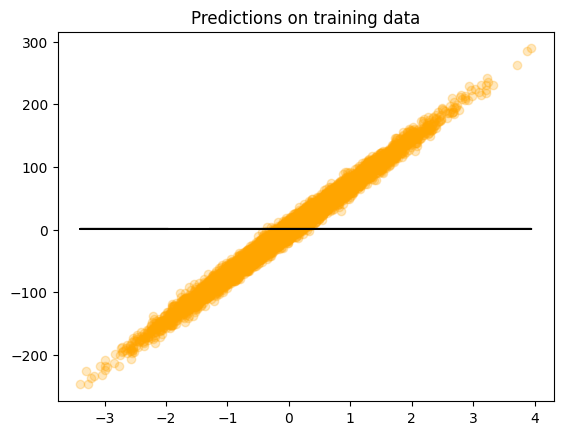

In [11]:
plt.scatter(X_train, y_train, color=dataset1_parameters['color'], alpha=0.25)
plt.plot(X_train, baseline_predictions, c='black')
plt.title('Predictions on training data')
plt.show()

#### Mean Square error and R-Squared (R²)

When modeling data, we'll always need a way to measure the model performance on absorbing and generalizing the main characteristics in the data.

For Linear regression, we usually use **Mean Square Error** which is the average of the squares of the errors. The errors are the gap between the predicted value and the real, expected output.

**MSE** has some problems. It is sensible to outliers, values who deviate too much from the average. It also may not reflect the actual data.

**R-Squared** is a statistical measure that indicates the proportion of the variance in the dependent variable which is predictable from the independent variable. However, a high **R²** doesn't mean a better model, as it doesn’t indicate whether the coefficient estimates and predictions are biased. So, removing outliers and avoiding bias are good ways to build a good regressor.

In our baseline regressor, we can see **MSE** and **R²** assuming crazy values. this is because our baseline model is totally unfit to our data. Now that we have our data ready for training and we understand a little better how Linear Regression behaves and how to measure its performance, lets dive into the actual training of a regressor.

### Training a regressor

The chunk of code bellow instantiate a new model, which will fit to our data. Next, for testing performance, we pass our test set to our model. I will return a list of predictions witch will be used for calculating MSE and R². 

In [12]:
regressor_1 = LinearRegression().fit(X_train, y_train)

test_predictions = regressor_1.predict(X=X_test)

mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 61.316081524967785
R² Score: 0.9884048101534084


Here we can see the MSE really small, which is a good sign that our model is performing well. We don't have too much outliers in this dataset, so we can expect we're in the right way. Our R² is way too high, but I'll not question it for the same reason I don't question MSE.

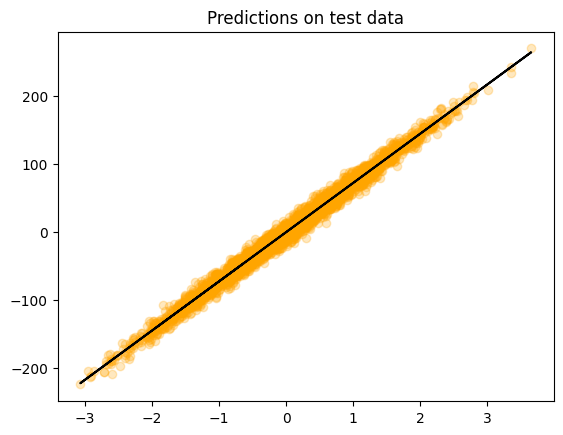

In [13]:
plt.scatter(X_test, y_test, color=dataset1_parameters['color'], alpha=0.25)
plt.plot(X_test, test_predictions, c='black')
plt.title('Predictions on test data')
plt.show()

You may think this is too easy. And you're right.

The thing is, the dataset is big enough for the model to easily understand the internal logic of the data and the noise is too small, so it doesn't really disturb our model during fitting stage.

This only proves how having lots of good data available makes our work easy. But, as you may think i'm cheating, let make another example. This time, with less data and more noise, more similar with the real world data.

### Modeling less data

In [14]:
dataset2_parameters = {
    'n_samples': 300,
    'n_features': 1,
    'noise': 124,
    'file_path': 'datasets/synthetic_data_2.csv',
    'color': ['indigo']
}

In [15]:
data_generator = SyntheticDataGenerator(
    n_samples=dataset2_parameters['n_samples'], 
    n_features=dataset2_parameters['n_features'],
    noise=dataset2_parameters['noise'])

data_generator.generate_data()

## This line writes the data to a file.
## Leave it commented so you don't overwrite your data accidentally
## by running "run all cells"

# data_generator.save_data_to_file(dataset2_parameters['file_path'])

In [16]:
df2 = pd.read_csv(dataset2_parameters['file_path'])

df2.sample(5)

,X0,y
41,0.242287,56.755552
74,-0.242514,-63.097597
156,0.446095,20.277578
264,0.203692,-10.106096
185,1.367353,-108.005009


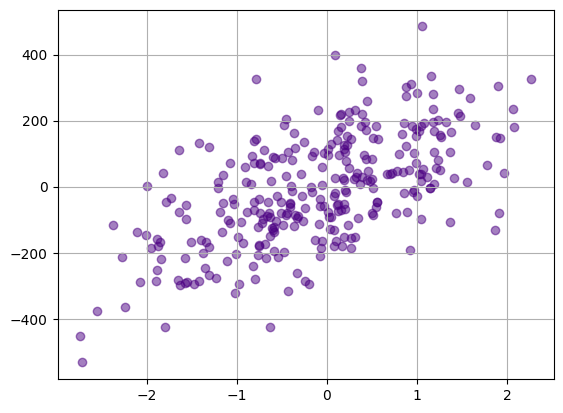

In [17]:
plt.scatter(x=df2['X0'], y=df2['y'], color=dataset2_parameters['color'], alpha=0.5)
plt.grid()
plt.show()

Notice how our data looks way more sparse now. We still can see the trend, a
positive correlation between our variables.

In [18]:
X2 = df2['X0']
y2 = df2['y']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33)

X_train2 = np.array(X_train2).reshape((-1, 1))
X_test2 = np.array(X_test2).reshape((-1, 1))
y_train2 = np.array(y_train2).reshape((-1, 1))
y_test2 = np.array(y_test2).reshape((-1, 1))

In [19]:
baseline_regressor2 = DummyRegressor(strategy='constant', constant=1)

baseline_regressor2.fit(X_train2, y_train2)

baseline_predictions2 = baseline_regressor.predict(X_train2)

mse = mean_squared_error(y_train2, baseline_predictions2)
r2 = r2_score(y_train2, baseline_predictions2)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 24434.3374046227
R² Score: -0.016583079267457945


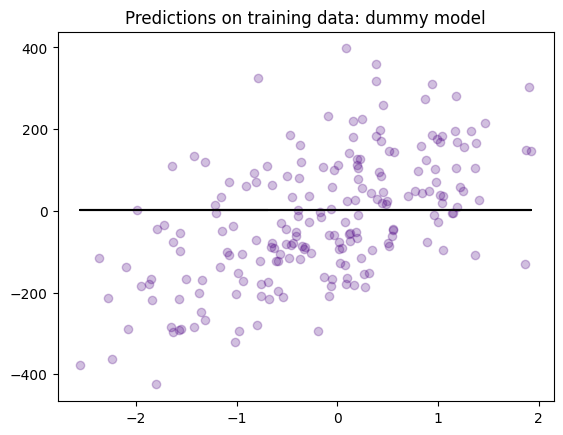

In [20]:
plt.scatter(X_train2, y_train2, color=dataset2_parameters['color'], alpha=0.25)
plt.plot(X_train2, baseline_predictions2, c='black')
plt.title('Predictions on training data: dummy model')
plt.show()

In [21]:
regressor_2 = LinearRegression().fit(X_train2, y_train2)

training_predictions_2 = regressor_1.predict(X=X_train2)

mse = mean_squared_error(y_train2, training_predictions_2)
r2 = r2_score(y_train2, training_predictions_2)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 16612.545402077056
R² Score: 0.308840167029906


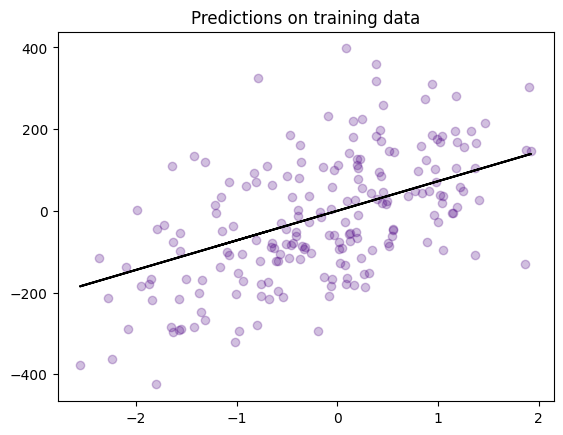

In [22]:
plt.scatter(X_train2, y_train2, color=dataset2_parameters['color'], alpha=0.25)
plt.plot(X_train2, training_predictions_2, c='black')
plt.title('Predictions on training data')
plt.show()

In [23]:
test_predictions2 = regressor_2.predict(X=X_test2)

mse = mean_squared_error(y_test2, test_predictions2)
r2 = r2_score(y_test2, test_predictions2)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 19838.29597496059
R² Score: 0.4199559942991705


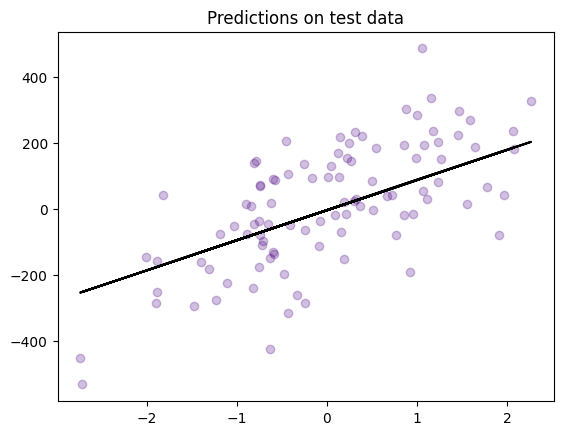

In [24]:
plt.scatter(X_test2, y_test2, color=dataset2_parameters['color'], alpha=0.25)
plt.plot(X_test2, test_predictions2, c='black')
plt.title('Predictions on test data')
plt.show()

Analyzing both train and test performance, we can see in this case a overfitting. This is probably because we generated insufficient data and the data noise is too big. Our model is not able to fit well. (In a real world situation, this is the time where you need to go get more data)

### Multiple Linear Regression

Before concluding this text, until now this we saw Linear Regression altho its more common that we use Multiple Linear Regression for our modeling problems. This is because we tend to have lots of features (independent variables) that we want to relate with our dependent variable. A **Multiple Linear Regression** is a extension of Linear Regression and its graphic is represented as a hyperplane of n+1 dimensions.

`predicton =  X(1) * W(1) + X(2) * W(2)... X(n) * W(n) + Bias`

In [25]:
dataset3_parameters = {
    'n_samples': 1800,
    'n_features': 4,
    'noise': 56,
    'file_path': 'datasets/synthetic_data_3.csv'
}

In [26]:
data_generator = SyntheticDataGenerator(
    n_samples=dataset3_parameters['n_samples'], 
    n_features=dataset3_parameters['n_features'],
    noise=dataset3_parameters['noise'])

data_generator.generate_data()

# data_generator.save_data_to_file(dataset3_parameters['file_path'])

In [27]:
df3 = pd.read_csv(dataset3_parameters['file_path'])

df3.sample(5)

,X0,X1,X2,X3,y
538,-1.282816,-1.424669,1.937582,-0.421209,16.730592
1428,-0.662524,0.990131,-0.342795,0.818062,61.403421
558,-0.273634,1.080798,2.212884,-0.050838,158.561540
385,0.038317,0.028170,0.243538,0.773656,95.110748
1596,0.977801,-0.094915,-0.970279,-0.164733,26.915601


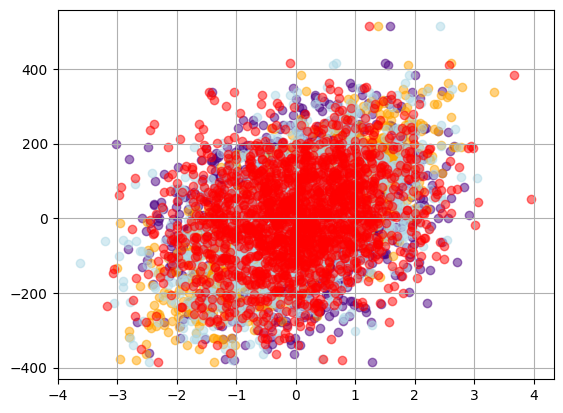

In [40]:
plt.scatter(x=df3['X0'], y=df3['y'], color='indigo', alpha=0.5)
plt.scatter(x=df3['X1'], y=df3['y'], color='orange', alpha=0.5)
plt.scatter(x=df3['X2'], y=df3['y'], color='lightblue', alpha=0.5)
plt.scatter(x=df3['X3'], y=df3['y'], color='red', alpha=0.5)
plt.grid()
plt.show()

# References

* [Life with data | How to create a baseline regression model](https://lifewithdata.com/2022/03/22/how-to-create-a-baseline-regression-model-in-scikit-learn/)

* [Sci-kit learn documentation | LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

* [Sci-kit learn documentation | train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

* [scribbr: Simple Linear Regression | An Easy Introduction & Examples](https://www.scribbr.com/statistics/simple-linear-regression/)

* [scribbr: Multiple Linear Regression | A Quick Guide (Examples)](https://www.scribbr.com/statistics/multiple-linear-regression/)

* [Statistics easily | Linear regression with sci-kit learn](https://statisticseasily.com/linear-regression-with-scikit-learn/)

* [Investopedia | r-squared ](https://www.investopedia.com/terms/r/r-squared.asp)

* [Stephen Allwright | interpret mse](https://stephenallwright.com/interpret-mse/)